In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import time
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
from sklearn.utils import resample
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

%load_ext autoreload
%autoreload 2
from NNFunctions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [2]:
x_train = pd.read_csv('./Data with correct player_atts/x_train.csv')
x_val = pd.read_csv('./Data with correct player_atts/x_val.csv')
x_test = pd.read_csv('./Data with correct player_atts/x_test.csv')

y_train = pd.read_csv('./Data with correct player_atts/y_train.csv')
y_val = pd.read_csv('./Data with correct player_atts/y_val.csv')
y_test = pd.read_csv('./Data with correct player_atts/y_test.csv')

x_train.shape, x_val.shape, x_test.shape

((8767, 53), (827, 53), (832, 53))

## Initialise Models

In [6]:

input_size = len(x_train.drop(columns ='match_api_id').columns)
output_size = 3

model_dict = {

'model4': LinearNN(5, (input_size,output_size), [128,256,128,32,16], nn.ReLU(), 0.5),
'model5': LinearNN(5, (input_size,output_size), [128,512,256,128,32], nn.ReLU(), 0.5),
'model6': LinearNN(5, (input_size,output_size), [64,512,256,128,32], nn.ReLU(), 0),
'model7': LinearNN(6, (input_size,output_size), [128,256,256,128,32,16], nn.ReLU(), 0.5),
'model8': LinearNN(6, (input_size,output_size), [64,256,256,128,64,32], nn.ReLU(), 0),
'model9': LinearNN(6, (input_size,output_size), [256,512,512,128,32,16], nn.ReLU(), 0.5),
'model10': LinearNN(7, (input_size,output_size), [64,256,256,128,32,16,8], nn.ReLU(), 0.5),
'model11': LinearNN(7, (input_size,output_size), [128,256,256,128,32,16,8], nn.ReLU(), 0),
'model12': LinearNN(7, (input_size,output_size), [256,512,128,64,32,16,8], nn.ReLU(), 0.5),
'model13': LinearNN(8, (input_size,output_size), [64,128,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(8, (input_size,output_size), [128,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(8, (input_size,output_size), [256,512,512,128,32,16,8,8], nn.ReLU(), 0.5),
'model13': LinearNN(9, (input_size,output_size), [64,128,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(9, (input_size,output_size), [128,256,256,128,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(9, (input_size,output_size), [256,512,512,256,128,32,16,8,8], nn.ReLU(), 0.5),
'model13': LinearNN(10, (input_size,output_size), [64,128,256,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(10, (input_size,output_size), [128,256,256,512,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(10, (input_size,output_size), [256,512,512,256,256,128,32,16,8,8], nn.ReLU(), 0.5),
}

In [6]:

input_size = len(x_train.drop(columns ='match_api_id').columns)
output_size = 3

model_dict = {

'model4': LinearNN(5, (input_size,output_size), [128,256,128,32,16], nn.ReLU(), 0.5),
'model5': LinearNN(5, (input_size,output_size), [128,512,256,128,32], nn.ReLU(), 0.5),
'model6': LinearNN(5, (input_size,output_size), [64,512,256,128,32], nn.ReLU(), 0),
'model7': LinearNN(6, (input_size,output_size), [128,256,256,128,32,16], nn.ReLU(), 0.5),
'model8': LinearNN(6, (input_size,output_size), [64,256,256,128,64,32], nn.ReLU(), 0),
'model9': LinearNN(6, (input_size,output_size), [256,512,512,128,32,16], nn.ReLU(), 0.5),
'model10': LinearNN(7, (input_size,output_size), [64,256,256,128,32,16,8], nn.ReLU(), 0.5),
'model11': LinearNN(7, (input_size,output_size), [128,256,256,128,32,16,8], nn.ReLU(), 0),
'model12': LinearNN(7, (input_size,output_size), [256,512,128,64,32,16,8], nn.ReLU(), 0.5),
'model13': LinearNN(8, (input_size,output_size), [64,128,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(8, (input_size,output_size), [128,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(8, (input_size,output_size), [256,512,512,128,32,16,8,8], nn.ReLU(), 0.5),
'model13': LinearNN(9, (input_size,output_size), [64,128,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(9, (input_size,output_size), [128,256,256,128,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(9, (input_size,output_size), [256,512,512,256,128,32,16,8,8], nn.ReLU(), 0.5),
'model13': LinearNN(10, (input_size,output_size), [64,128,256,256,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model14': LinearNN(10, (input_size,output_size), [128,256,256,512,256,128,64,32,16,8], nn.ReLU(), 0.5),
'model15': LinearNN(10, (input_size,output_size), [256,512,512,256,256,128,32,16,8,8], nn.ReLU(), 0.5),
}

## Train Models

In [76]:

input_size = len(x_train.drop(columns ='match_api_id').columns)
output_size = 3

model_dict = {

#'model4': LinearNN(5, (input_size,output_size), [128,256,128,32,16], nn.ReLU(), 0.2),
#'model7': LinearNN(6, (input_size,output_size), [128,256,256,128,32,16], nn.ReLU(), 0.2),
'model10': LinearNN(7, (input_size,output_size), [128,256,256,128,32,16,8], nn.ReLU(), 0.2),
'model12': LinearNN(8, (input_size,output_size), [64,128,256,128,64,32,16,8], nn.ReLU(), 0.2),
'model13': LinearNN(9, (input_size,output_size), [128,128,256,256,128,64,32,16,8], nn.ReLU(), 0.2),
#'model14': LinearNN(10, (input_size,output_size), [64,128,256,256,256,128,64,32,16,8], nn.ReLU(), 0.5),

}

In [21]:
model_dict['model13']: LinearNN(9, (input_size,output_size), [128,128,256,256,128,64,32,16,8], nn.ReLU(), 0.5)
model_dict['model14'] =  LinearNN(5, (input_size,output_size), [128,256,128,32,16], nn.Tanh(), 0.7)


In [115]:
splits = 5
results, big_losses_list = train_many(model_dict, x_train, y_train, batch_size = 'full' , splits = splits, epochs = 1, learning_rate = 0.01)
results


model10
.  .  .  .  .  
model12
.  .  .  .  .  
model13
.  .  .  .  .  

,t_acc,t_loss,v_acc,v_loss
model10,0.456256,1.065849,0.456257,1.065995
model12,0.456256,1.067444,0.456257,1.067340
model13,0.456256,1.065979,0.456257,1.066078


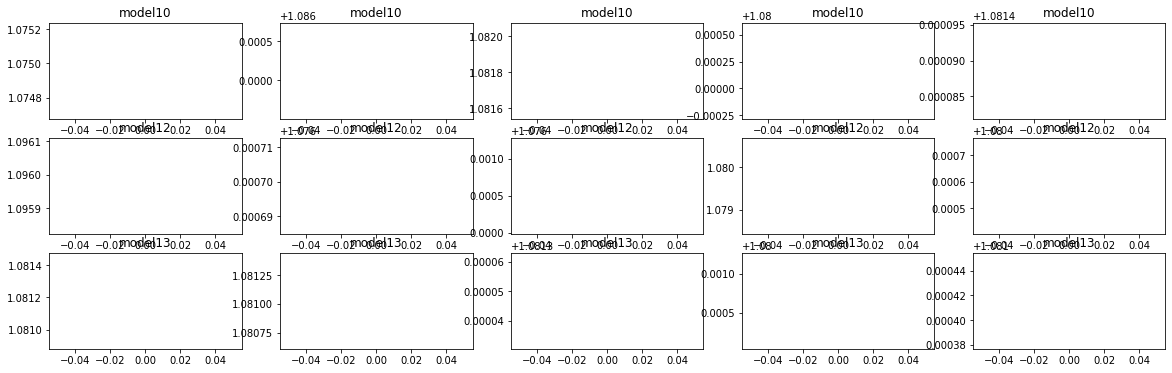

In [110]:
plot_losses(big_losses_list, model_dict, splits)

In [114]:
get_score(model_dict['model13'].model, x_train, y_train, scaler)

NameError: name 'get_score' is not defined

In [111]:
## Ensemble learning
scaler = preprocessing.StandardScaler().fit(x_train.iloc[:,1:])
x_ens = get_ens_df(x_train, scaler, model_dict)
x_ens_val = get_ens_df(x_val, scaler, model_dict)

RF_clf = RandomForestClassifier(max_depth=2, random_state=0)
RF_clf.fit(x_ens, y_train['target'])


RandomForestClassifier(max_depth=2, random_state=0)

In [112]:
print('Train Accuracy: {}'.format(RF_clf.score(x_ens, y_train['target'])))
print('Val Accuracy: {}'.format(RF_clf.score(x_ens_val, y_val['target'])))
print('Train log loss: {}'.format(log_loss(y_train['target'], RF_clf.predict_proba(x_ens))))
print('Val log loss: {}'.format(log_loss(y_val['target'], RF_clf.predict_proba(x_ens_val))))

Train Accuracy: 0.5088399680620509
Val Accuracy: 0.4860943168077388
Train log loss: 0.9995935638498044
Val log loss: 1.0247748557659306
